In [36]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
conn = sqlite3.connect('seasons.db')
df = pd.read_sql(sql = 'select * from season', con = conn)
columns = ["home_team","away_team","fthg","ftag","nmseason"]
df = df[columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2853 entries, 0 to 2852
Data columns (total 5 columns):
home_team    2853 non-null object
away_team    2853 non-null object
fthg         2853 non-null int64
ftag         2853 non-null int64
nmseason     2853 non-null int64
dtypes: int64(3), object(2)
memory usage: 111.5+ KB


In [6]:
teams = df["home_team"].unique()

In [7]:
# Make dictionary Team:Rating
# Rating is Goals For - Goals Against
dict = {}
for team in teams:
    goals_for = df[df["home_team"]==team]["fthg"].sum() + df[df["away_team"]==team]["ftag"].sum()
    goals_against = df[df["home_team"]==team]["ftag"].sum() + df[df["away_team"]==team]["fthg"].sum()
    number_of_games = len(df[(df["home_team"]== team) | (df["away_team"]==team)])
    dict[team] = (goals_for - goals_against) / number_of_games
    

In [8]:
df[df["home_team"]=="Bayern Munich"]["fthg"].head()

0     6
19    3
31    3
46    1
64    2
Name: fthg, dtype: int64

In [9]:
len(df[(df["home_team"]=="Hoffenheim") | (df["away_team"]=="Hoffenheim")])

317

In [10]:
df[df["home_team"]=="Hoffenheim"].count()

home_team    159
away_team    159
fthg         159
ftag         159
nmseason     159
dtype: int64

In [11]:
df[df["away_team"]=="Hoffenheim"].count()

home_team    158
away_team    158
fthg         158
ftag         158
nmseason     158
dtype: int64

In [12]:
156+ 157

313

In [47]:
dict

{'Augsburg': -0.2559241706161137,
 'Bayern Munich': 1.6549520766773163,
 'Bielefeld': -0.7941176470588235,
 'Bochum': -0.6911764705882353,
 'Braunschweig': -0.9117647058823529,
 'Cottbus': -0.7941176470588235,
 'Darmstadt': -0.7352941176470589,
 'Dortmund': 1.0223642172523961,
 'Ein Frankfurt': -0.32616487455197135,
 'FC Koln': -0.363265306122449,
 'Fortuna Dusseldorf': -0.5294117647058824,
 'Freiburg': -0.39591836734693875,
 'Greuther Furth': -1.0,
 'Hamburg': -0.35782747603833864,
 'Hannover': -0.36917562724014336,
 'Hertha': -0.2816326530612245,
 'Hoffenheim': -0.006389776357827476,
 'Ingolstadt': -0.4411764705882353,
 'Kaiserslautern': -0.4852941176470588,
 'Karlsruhe': -0.7058823529411765,
 'Leverkusen': 0.49201277955271566,
 "M'gladbach": 0.05750798722044728,
 'Mainz': -0.05017921146953405,
 'Nurnberg': -0.4470588235294118,
 'Paderborn': -1.0,
 'RB Leipzig': 0.7560975609756098,
 'Schalke 04': 0.3003194888178914,
 'St Pauli': -0.9705882352941176,
 'Stuttgart': -0.1111111111111111,

In [48]:
df[(df['away_team']=="Bayern Munich") & (df['nmseason']==17)]

,home_team,away_team,fthg,ftag,nmseason
15,Werder Bremen,Bayern Munich,0,2,17
21,Hoffenheim,Bayern Munich,2,0,17
38,Schalke 04,Bayern Munich,0,3,17
62,Hertha,Bayern Munich,2,2,17


In [49]:
rating_df =  pd.DataFrame()

In [50]:
# make tableau avec des dates (seasons sur y) et noms des equipes sur x

"""
    Equipe1 Equipe2 Equipe2
15
14
13
12
11
10
9
8
7
"""

'\n    Equipe1 Equipe2 Equipe2\n15\n14\n13\n12\n11\n10\n9\n8\n7\n'

In [51]:
# teams = df["home_team"].unique() - liste de tous les equipes
seasons_tableau = df["nmseason"].unique()

In [52]:
seasons_tableau

array([17, 16, 15, 14, 13, 12, 11, 10,  9,  8])

In [53]:
dict_res = {}
for team in teams:
    arr = []
    for s in seasons_tableau:
        goals_for = df[(df["home_team"]==team) & (df["nmseason"]==s)]["fthg"].sum() + df[(df["away_team"]==team) & (df["nmseason"]==s)]["ftag"].sum()
        goals_against = df[(df["home_team"]==team) & (df["nmseason"]==s)]["ftag"].sum() + df[(df["away_team"]==team) & (df["nmseason"]==s)]["fthg"].sum()
        number_of_games = len(df[((df["home_team"]== team) | (df["away_team"]==team)) & (df["nmseason"]==s)])
        if number_of_games != 0:
            rate = (goals_for - goals_against) / number_of_games
        else:
            rate = 0
        arr.append(rate)
    dict_res[team] = arr
# a | b & c

In [54]:
dict_res

{'Augsburg': [0.42857142857142855,
  -0.47058823529411764,
  -0.29411764705882354,
  0.0,
  0.0,
  -0.5294117647058824,
  -0.38235294117647056,
  0,
  0,
  0],
 'Bayern Munich': [1.2857142857142858,
  1.9705882352941178,
  1.8529411764705883,
  1.8235294117647058,
  2.088235294117647,
  2.3529411764705883,
  1.6176470588235294,
  1.2058823529411764,
  1.2058823529411764,
  0.8529411764705882],
 'Bielefeld': [0, 0, 0, 0, 0, 0, 0, 0, 0, -0.7941176470588235],
 'Bochum': [0, 0, 0, 0, 0, 0, 0, 0, -0.9117647058823529, -0.47058823529411764],
 'Braunschweig': [0, 0, 0, 0, -0.9117647058823529, 0, 0, 0, 0, 0],
 'Cottbus': [0, 0, 0, 0, 0, 0, 0, 0, 0, -0.7941176470588235],
 'Darmstadt': [0,
  -1.0294117647058822,
  -0.4411764705882353,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Dortmund': [2.7142857142857144,
  0.9411764705882353,
  1.411764705882353,
  0.14705882352941177,
  1.2352941176470589,
  1.1470588235294117,
  1.6176470588235294,
  1.3235294117647058,
  0.35294117647058826,
  0.676470588235294

In [55]:
df2 = pd.DataFrame(dict_res, index=seasons_tableau, columns=teams)

In [56]:
df2

,Bayern Munich,Hamburg,Hertha,Hoffenheim,Mainz,Schalke 04,Wolfsburg,Freiburg,M'gladbach,FC Koln,...,Braunschweig,Nurnberg,Greuther Furth,Fortuna Dusseldorf,Kaiserslautern,St Pauli,Bochum,Bielefeld,Cottbus,Karlsruhe
17,1.285714,-1.000000,0.000000,0.714286,-0.571429,-0.142857,-0.428571,-0.857143,-0.285714,-1.857143,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16,1.970588,-0.823529,-0.117647,0.794118,-0.323529,0.147059,-0.529412,-0.529412,-0.117647,0.264706,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15,1.852941,-0.176471,0.000000,-0.441176,0.117647,0.058824,-0.058824,0.000000,0.500000,-0.117647,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,1.823529,-0.735294,-0.470588,-0.176471,-0.058824,0.058824,1.000000,-0.323529,0.794118,-0.176471,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,2.088235,-0.705882,-0.235294,0.058824,-0.058824,0.588235,0.382353,-0.529412,0.470588,0.000000,...,-0.911765,-0.970588,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,2.352941,-0.323529,0.000000,-0.735294,-0.058824,0.235294,-0.147059,0.147059,-0.117647,0.000000,...,0.000000,-0.235294,-1.0,-0.529412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11,1.617647,-0.647059,-0.764706,-0.176471,-0.117647,0.882353,-0.382353,-0.470588,0.735294,-1.058824,...,0.000000,-0.323529,0.0,0.000000,-0.882353,0.000000,0.000000,0.000000,0.000000,0.000000
10,1.205882,-0.176471,0.000000,0.000000,0.382353,-0.176471,-0.147059,-0.264706,-0.500000,-0.441176,...,0.000000,0.058824,0.0,0.000000,-0.088235,-0.970588,0.000000,0.000000,0.000000,0.000000
9,1.205882,0.441176,-0.647059,0.058824,-0.176471,0.647059,0.176471,-0.705882,-0.500000,-0.264706,...,0.000000,-0.764706,0.0,0.000000,0.000000,0.000000,-0.911765,0.000000,0.000000,0.000000
8,0.852941,0.058824,0.205882,0.411765,0.000000,0.352941,1.147059,0.000000,-0.676471,-0.441176,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.470588,-0.794118,-0.794118,-0.705882


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 17 to 8
Data columns (total 31 columns):
Bayern Munich         10 non-null float64
Hamburg               10 non-null float64
Hertha                10 non-null float64
Hoffenheim            10 non-null float64
Mainz                 10 non-null float64
Schalke 04            10 non-null float64
Wolfsburg             10 non-null float64
Freiburg              10 non-null float64
M'gladbach            10 non-null float64
FC Koln               10 non-null float64
Augsburg              10 non-null float64
Dortmund              10 non-null float64
Ein Frankfurt         10 non-null float64
Leverkusen            10 non-null float64
Stuttgart             10 non-null float64
Werder Bremen         10 non-null float64
Hannover              10 non-null float64
RB Leipzig            10 non-null float64
Darmstadt             10 non-null float64
Ingolstadt            10 non-null float64
Paderborn             10 non-null float64
Braunschweig   

In [58]:
df5 = df[((df.home_team =="Bayern Munich") | (df.away_team == "Bayern Munich")) & ((df.home_team =="Mainz") | (df.away_team == "Mainz"))]

In [59]:
df5.iloc[:,:]

,home_team,away_team,fthg,ftag,nmseason
28,Bayern Munich,Mainz,4,0,17
171,Mainz,Bayern Munich,1,3,16
325,Bayern Munich,Mainz,2,2,16
426,Mainz,Bayern Munich,0,3,15
578,Bayern Munich,Mainz,1,2,15
819,Mainz,Bayern Munich,1,2,14
972,Bayern Munich,Mainz,2,0,14
1054,Bayern Munich,Mainz,4,1,13
1208,Mainz,Bayern Munich,0,2,13
1306,Bayern Munich,Mainz,3,1,12


In [60]:
df.head()

,home_team,away_team,fthg,ftag,nmseason
0,Bayern Munich,Leverkusen,3,1,17
1,Hamburg,Augsburg,1,0,17
2,Hertha,Stuttgart,2,0,17
3,Hoffenheim,Werder Bremen,1,0,17
4,Mainz,Hannover,0,1,17


In [61]:
#df[df["home_team"]=="Bayern Munich"].groupby('home_team')["fthg"].mean() 

In [62]:
df.groupby("home_team")["fthg"].agg(['count','mean','max','min'])

,count,mean,max,min
home_team,,,,
Augsburg,106,1.330189,4,0
Bayern Munich,156,2.858974,9,0
Bielefeld,17,0.941176,2,0
Bochum,34,1.205882,3,0
Braunschweig,17,1.058824,4,0
Cottbus,17,1.117647,3,0
Darmstadt,34,0.970588,3,0
Dortmund,156,2.256410,6,0
Ein Frankfurt,139,1.460432,6,0


In [63]:
%matplotlib inline

In [64]:
df.head()
"""
Хотим предсказать fthg ftag
y1 = home
y2 = !

Y_test , Y_train
X_test, X_train

test -> 20% 
train -> 80%

y1 and y2

Y_test1 , Y_train1
X_test1, X_train1

Y_test2 , Y_train2
X_test2, X_train2

y1 = ftag
x1 = home_team away_team fthg

mean = среднее значение -> positianal_rating{team1}; last_games_team{team1}
mean(fthg) -> 


median = 

sklearn

"""

'\nХотим предсказать fthg ftag\ny1 = home\ny2 = !\n\nY_test , Y_train\nX_test, X_train\n\ntest -> 20% \ntrain -> 80%\n\ny1 and y2\n\nY_test1 , Y_train1\nX_test1, X_train1\n\nY_test2 , Y_train2\nX_test2, X_train2\n\ny1 = ftag\nx1 = home_team away_team fthg\n\nmean = среднее значение -> positianal_rating{team1}; last_games_team{team1}\nmean(fthg) -> \n\n\nmedian = \n\nsklearn\n\n'

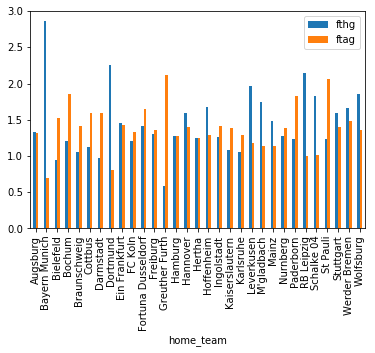

In [65]:

df.drop('nmseason', axis=1).groupby("home_team").mean().plot(kind="bar")

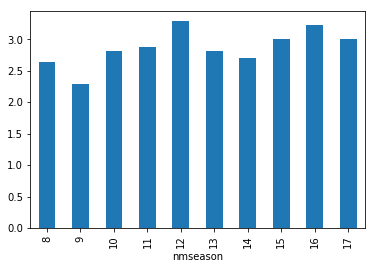

In [66]:
df[df["home_team"]=="Bayern Munich"].groupby('nmseason')["fthg"].mean().plot(kind="bar")

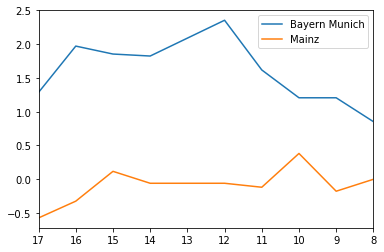

In [67]:
teams_selected = ["Bayern Munich", "Mainz"]
df2[teams_selected].plot()

In [68]:
df2[teams_selected]

,Bayern Munich,Mainz
17,1.285714,-0.571429
16,1.970588,-0.323529
15,1.852941,0.117647
14,1.823529,-0.058824
13,2.088235,-0.058824
12,2.352941,-0.058824
11,1.617647,-0.117647
10,1.205882,0.382353
9,1.205882,-0.176471
8,0.852941,0.000000


In [69]:
df[(df['home_team']=="Bayern Munich") ]

dict_res1 = {}
arr = []
for s in seasons_tableau:
    goals_for = df[(df["home_team"]=="Bayern Munich") & (df["nmseason"]==s)]["fthg"].sum()
    goals_against = df[(df["home_team"]=="Bayern Munich") & (df["nmseason"]==s)]["ftag"].sum()
    number_of_games = len(df[(df["home_team"]== "Bayern Munich") & (df["nmseason"]==s)])
    if number_of_games != 0:
        rate = (goals_for - goals_against) / number_of_games
    else:
        rate = 0
    arr.append(rate)
    dict_res1["Bayern Munich"] = arr

In [70]:
dict_res1

{'Bayern Munich': [2.0,
  2.7058823529411766,
  2.5294117647058822,
  2.2941176470588234,
  1.9411764705882353,
  2.6470588235294117,
  2.5294117647058822,
  2.0588235294117645,
  1.5294117647058822,
  1.2941176470588236]}

In [71]:
arr = []
for s in seasons_tableau:
    goals_for = df[(df["away_team"]=="Mainz") & (df["nmseason"]==s)]["ftag"].sum()
    goals_against = df[(df["away_team"]=="Mainz") & (df["nmseason"]==s)]["fthg"].sum()
    number_of_games = len(df[(df["away_team"]== "Mainz") & (df["nmseason"]==s)])
    if number_of_games != 0:
        rate = (goals_for - goals_against) / number_of_games
    else:
        rate = 0
    print("For:{}, Against:{}, games:{}, seasom:{}, rate:{}".format(goals_for,goals_against,number_of_games, s, rate))

    arr.append(rate)
    dict_res1["Mainz"] = arr

For:1, Against:6, games:3, seasom:17, rate:-1.6666666666666667
For:14, Against:29, games:17, seasom:16, rate:-0.8823529411764706
For:23, Against:24, games:17, seasom:15, rate:-0.058823529411764705
For:18, Against:28, games:17, seasom:14, rate:-0.5882352941176471
For:24, Against:37, games:17, seasom:13, rate:-0.7647058823529411
For:20, Against:25, games:17, seasom:12, rate:-0.29411764705882354
For:20, Against:25, games:17, seasom:11, rate:-0.29411764705882354
For:30, Against:23, games:17, seasom:10, rate:0.4117647058823529
For:14, Against:28, games:17, seasom:9, rate:-0.8235294117647058
For:0, Against:0, games:0, seasom:8, rate:0


In [72]:
df3 = pd.DataFrame(dict_res1, index=seasons_tableau, columns=our_teams)
df3

NameError: name 'our_teams' is not defined

In [73]:
our_teams = ["Bayern Munich","Mainz"]

In [264]:
our_teams

['Bayern Munich', 'Mainz']

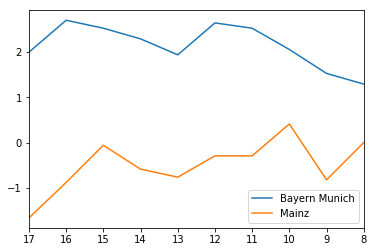

In [268]:
df3.plot()

In [311]:
num = len(df[(df["away_team"] == 'Mainz') & (df["nmseason"] == 8)])
num

0

In [306]:
against = df[(df["away_team"] == 'Mainz') & (df["nmseason"] == 12)]["fthg"].sum()
against

25

In [78]:
for_g = df[(df["away_team"] == 'Mainz') & (df["nmseason"] == 12)]["ftag"].sum()
for_g

20

In [13]:
df3 = df[((df["away_team"] == 'Mainz') | (df["home_team"] == 'Bayern Munich')) & (df["nmseason"] == 11) ]
df.std()

fthg        1.334875
ftag        1.199256
nmseason    2.697274
dtype: float64

In [25]:
home_teams = pd.get_dummies(df["home_team"], prefix="H").iloc[:,1:]
away_teams = pd.get_dummies(df["away_team"], prefix="A").iloc[:,1:]
df_new = pd.concat([df, home_teams, away_teams], axis=1)
df_new["diff"] = df_new["fthg"] - df_new["ftag"]
#df_new.head()

,home_team,away_team,fthg,ftag,nmseason,H_Bayern Munich,H_Bielefeld,H_Bochum,H_Braunschweig,H_Cottbus,...,A_Mainz,A_Nurnberg,A_Paderborn,A_RB Leipzig,A_Schalke 04,A_St Pauli,A_Stuttgart,A_Werder Bremen,A_Wolfsburg,diff
0,Bayern Munich,Werder Bremen,6,0,16,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6
1,Augsburg,Wolfsburg,0,2,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-2
2,Dortmund,Mainz,2,1,16,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,Ein Frankfurt,Schalke 04,1,0,16,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,FC Koln,Darmstadt,2,0,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [44]:
#df_new = df_new.drop(['home_team','away_team', 'fthg', 'ftag'], axis=1) 

from sklearn.model_selection import train_test_split
df_new.head()
X = df_new.drop(['diff'], axis=1)

y = df_new['diff']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# here it goes
from sklearn.svm import SVR

regressor = SVR(kernel="rbf")

regressor.fit(X_train,y_train)

prediction = regressor.predict(X_test)
prediction_b = prediction > 0
y_test_b = y_test > 0 
#plt.scatter(y_test_b,prediction_b)
#plt.xlabel('Y Test')
#plt.ylabel('Predicted Y')
y_test_b.head()


1273     True
1774     True
1751    False
2270     True
720     False
Name: diff, dtype: bool

In [35]:

pd.concat([df, home_teams, away_teams], axis=1)

#another way:
pd.get_dummies(df, columns=["home_team", "away_team"], drop_first=True)

ds_before = df.drop(['ftag'], axis=1) 

y = df.drop(['home_team','away_team','nmseason', "fthg"], axis=1) 

X = pd.get_dummies(ds_before, columns=["home_team", "away_team"], drop_first=True)

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

regressor = SVR(kernel="rbf")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X = X_test)

y_pred = sc_y.inverse_transform(y_pred)

#y_pred


NameError: name 'home_teams' is not defined

In [36]:
y1 = df.drop(['home_team','away_team','nmseason', "ftag"], axis=1) 
y2 = df.drop(['home_team','away_team','nmseason', "fthg"], axis=1) 
X1 = df_new.drop("fthg", axis=1) # все кроме домашней
X2 = df_new.drop("ftag", axis=1)

NameError: name 'df_new' is not defined

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 0)


In [16]:
regressor = SVR(kernel="rbf")


In [17]:
regressor.fit(X_train1,y_train1.fthg)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [141]:
prediction = regressor.predict(X_test1)
prediction.max()

2.6019768932180369

In [106]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.5)


In [107]:
reg.fit(X_train1,y_train1)


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
#pred1 = reg.predict(X_test1)
#y_test1

In [61]:
from sklearn.linear_model import ElasticNet
alpha = 0.1
from sklearn.metrics import r2_score

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)


In [62]:
y_pred_lasso1 = enet.fit(X_train1, y_train1).predict(X_test1)

In [63]:
r2_score_lasso = r2_score(y_test1, y_pred_lasso1)
r2_score_lasso

0.00049865800293791285

In [68]:
print(metrics.accuracy_score(y_test1.fthg,y_pred_lasso1))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [135]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  
"""
clf = xgb.XGBClassifier(base_score=0.5, colsample_bytree=0.5, 
                               gamma=0.017,learning_rate=0.15, max_delta_step=0, 
                               max_depth=8, min_child_weight=3, n_estimators=300, 
                               nthread=-1, objective='binary:logistic', seed=0, 
                               silent=True, subsample=0.9)

"""
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)



/Users/denisbolshakov/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


NameError: name 'f1_scorer' is not defined

In [131]:
type(y_train1.fthg)

pandas.core.series.Series

In [154]:
#from sklearn import metrics
from sklearn import tree
from sklearn.cross_validation import cross_val_score

In [164]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
knn = KNeighborsRegressor(n_neighbors=10)
clf = tree.DecisionTreeRegressor()
#clf = clf.fit(X_train1, y_train1)
#knn.fit(X_train1, y_train1)

score1 = cross_val_score(clf,X_train1, y_train1, cv=10, scoring="accuracy").mean()
score2 = cross_val_score(lr,X_train1, y_train1, cv=10, scoring="accuracy").mean()


/Users/denisbolshakov/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


IndexError: too many indices for array

In [165]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=200)
clf.fit(X_train1, y_train1)


/Users/denisbolshakov/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=200, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

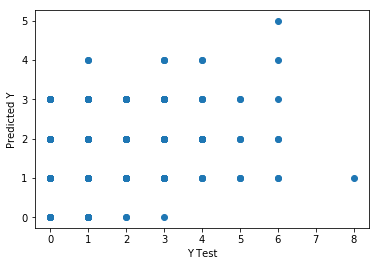

In [167]:
pred1 = clf.predict(X_test1)
plt.scatter(y_test1,pred1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
# (y1 - y) 

In [141]:
#metrics.mean_absolute_error(y_test1, pred1)
y_test1

,fthg
1726,3
333,1
70,2
569,1
118,1
124,2
1554,0
2621,4
2005,3
923,2


In [170]:
y_test1.max()

fthg    8
dtype: int64

In [170]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [171]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}


In [178]:
from sklearn import metrics
y_test_predict = {}
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train1, y_train1.fthg)
    y_test_predict[name] = estimator.predict(X_test1)


In [179]:
y_test_predict["K-nn"]
#y_train1

array([ 1.8,  1.6,  2. ,  1.2,  1. ,  1. ,  1.2,  2.2,  2. ,  0.2,  1.2,
        2.6,  1. ,  1.8,  0.6,  1.6,  2.6,  0.4,  3. ,  2.2,  3. ,  2.4,
        1. ,  1.6,  0.8,  2. ,  1.2,  2.2,  1.2,  1. ,  0.6,  1. ,  2. ,
        1.2,  2.2,  1.8,  1.8,  1. ,  1.6,  2. ,  2. ,  1.2,  1. ,  1.4,
        3.4,  0.4,  2.4,  1.6,  3. ,  2.4,  2.6,  2.2,  1.2,  2.6,  1.8,
        2.4,  2.4,  3.2,  1.4,  1.8,  1.4,  1.2,  1.6,  2. ,  2.2,  2. ,
        1. ,  1.2,  1.4,  2.2,  2.2,  1.4,  0.8,  2.2,  1.4,  2.2,  2. ,
        1.8,  1.6,  1.2,  1.6,  1.4,  2. ,  1.4,  1.4,  1.8,  2.2,  1.2,
        0.8,  1.8,  1.4,  0.6,  1.2,  0.6,  2.2,  2.4,  2.6,  1.6,  1.8,
        2. ,  2. ,  1.2,  1. ,  0.8,  1.8,  2.2,  2.2,  1.2,  2. ,  2.4,
        1.2,  2. ,  1.8,  1.6,  3. ,  0.6,  2.2,  1.4,  3.4,  0.8,  1. ,
        2.4,  1.4,  0.6,  1.8,  1.6,  1.2,  1.8,  0.8,  1.2,  2. ,  1.4,
        1.2,  2.2,  1.2,  2.8,  1.8,  2.4,  1.2,  1.4,  1.4,  1.4,  1.4,
        1.4,  1.6,  0.8,  2. ,  1.6,  1.2,  1. ,  1

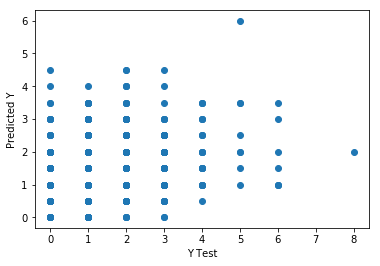

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.scatter(y_test1,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

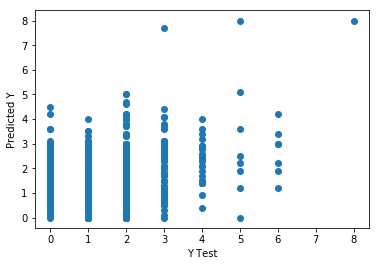

In [175]:
plt.scatter(y_test1,y_test_predict["Extra trees"])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

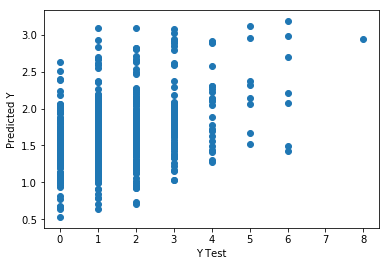

In [176]:
plt.scatter(y_test1,y_test_predict["Ridge"])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [169]:
import pygame, sys
y_test_predict["Ridge"]

NameError: name 'y_test_predict' is not defined

In [48]:
def get_mean(dfr):
    n_goals = dfr[(dfr["away_team"]=="Mainz")]["ftag"].sum() + dfr[(dfr["home_team"]=="Mainz")]["fthg"].sum()
    number_of_games = len(dfr[(dfr["home_team"]== "Mainz") | (dfr["away_team"]== "Mainz") ])
    return n_goals/number_of_games



In [49]:
get_mean(df[df.nmseason==17])

1.0

In [50]:
m = df[(df.nmseason==17) & ((df.home_team=="Mainz")|(df.away_team=="Mainz"))]

In [51]:
def get_std(dfr):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-51-cd69c977264b>, line 2)

In [52]:
from sklearn import metrics
print(metrics.accuracy_score(y_test1,y_test_predict))

NameError: name 'y_test_predict' is not defined

In [ ]:
home_teams = pd.get_dummies(df["home_team"], prefix="H").iloc[:,1:]
away_teams = pd.get_dummies(df["away_team"], prefix="A").iloc[:,1:]
df_new = pd.concat([df, home_teams, away_teams], axis=1)
df_new.head()

In [76]:
df.head()

"""
         Season   Wins  Loses  Draws
Mainz  |   17        10     7      9
       |   18        15    20      9 
-----    -----------------------------            
Bayern |   17        10     7      9
       |   17        10     7      9
         ------------------------------
         
Season 
  17   
  
  18
  19
    
"""

'\n         Season   Wins  Loses  Draws\nMainz  |   17        10     7      9\n       |   18        15    20      9 \n-----    -----------------------------            \nBayern |   17        10     7      9\n       |   17        10     7      9\n         ------------------------------\n         \nSeason \n  17   \n  \n  18\n  19\n    \n'

In [7]:
df["diff"] = df["fthg"] - df["ftag"]


In [8]:
df.head()

,home_team,away_team,fthg,ftag,nmseason,diff
0,Bayern Munich,Leverkusen,3,1,17,2
1,Hamburg,Augsburg,1,0,17,1
2,Hertha,Stuttgart,2,0,17,2
3,Hoffenheim,Werder Bremen,1,0,17,1
4,Mainz,Hannover,0,1,17,-1
